<a href="https://colab.research.google.com/github/Ayman-analyst/IMDb-Movie-Trends/blob/main/IMDB_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Dataset**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aymanmahmoud","key":"32b46b0f552d2857e4d3edf37b99f7eb"}'}

In [ ]:
import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows
License(s): CC0-1.0
  0% 0.00/175k [00:00<?, ?B/s]
100% 175k/175k [00:00<00:00, 62.5MB/s]


In [ ]:
!unzip imdb-dataset-of-top-1000-movies-and-tv-shows.zip -d imdb-dataset-of-top-1000-movies-and-tv-shows

Archive:  imdb-dataset-of-top-1000-movies-and-tv-shows.zip
  inflating: imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv  


In [ ]:
import os
print(os.listdir("imdb-dataset-of-top-1000-movies-and-tv-shows"))

['imdb_top_1000.csv']


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv('imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


## **Missing Values**

In [ ]:
missing_values_count = df.isnull().sum()
missing_values_count

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0


# **Visualizing Missing values**

In [ ]:
df_nan = df[df.isna().any(axis=1)]
df_nan.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
18,https://m.media-amazon.com/images/M/MV5BNjViNW...,Hamilton,2020,PG-13,160 min,"Biography, Drama, History",8.6,The real life of one of America's foremost fou...,90.0,Thomas Kail,Lin-Manuel Miranda,Phillipa Soo,Leslie Odom Jr.,Renée Elise Goldsberry,55291,NaN
20,https://m.media-amazon.com/images/M/MV5BOTc2ZT...,Soorarai Pottru,2020,U,153 min,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",NaN,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
30,https://m.media-amazon.com/images/M/MV5BYjBmYT...,Seppuku,1962,NaN,133 min,"Action, Drama, Mystery",8.6,When a ronin requesting seppuku at a feudal lo...,85.0,Masaki Kobayashi,Tatsuya Nakadai,Akira Ishihama,Shima Iwashita,Tetsurô Tanba,42004,NaN
32,https://m.media-amazon.com/images/M/MV5BZjc4ND...,It's a Wonderful Life,1946,PG,130 min,"Drama, Family, Fantasy",8.6,An angel is sent from Heaven to help a despera...,89.0,Frank Capra,James Stewart,Donna Reed,Lionel Barrymore,Thomas Mitchell,405801,NaN
46,https://m.media-amazon.com/images/M/MV5BZmY2Nj...,Hotaru no haka,1988,U,89 min,"Animation, Drama, War",8.5,A young boy and his little sister struggle to ...,94.0,Isao Takahata,Tsutomu Tatsumi,Ayano Shiraishi,Akemi Yamaguchi,Yoshiko Shinohara,235231,NaN


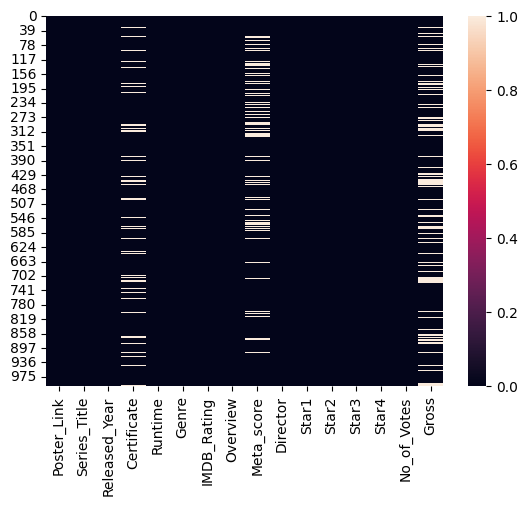

In [ ]:
sns.heatmap(df.isnull())
plt.show()

# **Handle Missing Values**

In [ ]:
print("Mode of Meta_score" ,df['Meta_score'].mode())

In [ ]:
df['Certificate'] = df['Certificate'].fillna(df["Certificate"].mode()[0])
df['Meta_score'] = df['Meta_score'].fillna(df["Meta_score"].mode()[0])

In [ ]:
# Delete Missing Values in Gross as we are not able to forecast it
df.dropna(subset= ['Gross'], inplace=True)
df.shape

(831, 16)

In [ ]:
df.isnull().sum()

,0
Poster_Link,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0


# **Handling Different cols unimportant values and change their type**

In [ ]:
df["Runtime"].unique()


array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '132 min',
       '169 min', '130 min', '125 min', '189 min', '116 min', '127 min',
       '118 min', '121 min', '207 min', '122 min', '106 min', '112 min',
       '151 min', '150 min', '155 min', '119 min', '110 min', '88 min',
       '137 min', '165 min', '109 min', '102 min', '87 min', '126 min',
       '117 min', '181 min', '149 min', '105 min', '164 min', '170 min',
       '98 min', '101 min', '113 min', '134 min', '229 min', '115 min',
       '147 min', '95 min', '123 min', '131 min', '153 min', '108 min',
       '104 min', '89 min', '81 min', '99 min', '160 min', '114 min',
       '129 min', '228 min', '128 min', '103 min', '143 min', '107 min',
       '68 min', '138 min', '167 min', '163 min', '186 min', '135 min',
       '140 min', '180 min', '158 min', '210 min', '156 min'

In [ ]:
df["Runtime"].nunique()

133

In [ ]:
df["Runtime"].value_counts()

,count
Runtime,
101 min,21
130 min,20
122 min,19
100 min,19
129 min,18
...,...
205 min,1
212 min,1
238 min,1


In [ ]:
df["Runtime"] = df["Runtime"].str.replace(' min', '')
df["Runtime"] = df["Runtime"].astype(int)

In [ ]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,"696,690"
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [ ]:
df["Gross"] = df["Gross"].str.replace(",", "").astype(float)  # Convert to float first

In [ ]:
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971,PG,157,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690.0
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435.0
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612.0
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024.0


In [ ]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 'PG', '1953'], dtype=object)

In [ ]:
# Removing PG value form Released_Year year
df = df.drop(df[df['Released_Year'] == 'PG'].index)
df.shape

(830, 16)

In [ ]:
df['Released_Year'].nunique()

94

In [ ]:
df["Released_Year"].value_counts()

,count
Released_Year,
2014,31
2004,29
2013,27
2009,25
2001,25
...,...
1934,1
1937,1
1921,1


In [ ]:
df['Released_Year'] = df['Released_Year'].astype(int)
df['Meta_score'] = df['Meta_score'].astype(int)
df['Gross'] = df['Gross'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    830 non-null    object 
 1   Series_Title   830 non-null    object 
 2   Released_Year  830 non-null    int64  
 3   Certificate    830 non-null    object 
 4   Runtime        830 non-null    int64  
 5   Genre          830 non-null    object 
 6   IMDB_Rating    830 non-null    float64
 7   Overview       830 non-null    object 
 8   Meta_score     830 non-null    int64  
 9   Director       830 non-null    object 
 10  Star1          830 non-null    object 
 11  Star2          830 non-null    object 
 12  Star3          830 non-null    object 
 13  Star4          830 non-null    object 
 14  No_of_Votes    830 non-null    int64  
 15  Gross          830 non-null    int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 110.2+ KB


# **Removing unnecessary cols**

In [ ]:
df=df.drop(['Overview','Poster_Link'], axis=1)
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157,"Drama, War, Western",7.6,77,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
991,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.6,50,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
992,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,65,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
994,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,96,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


# **Visualizing**

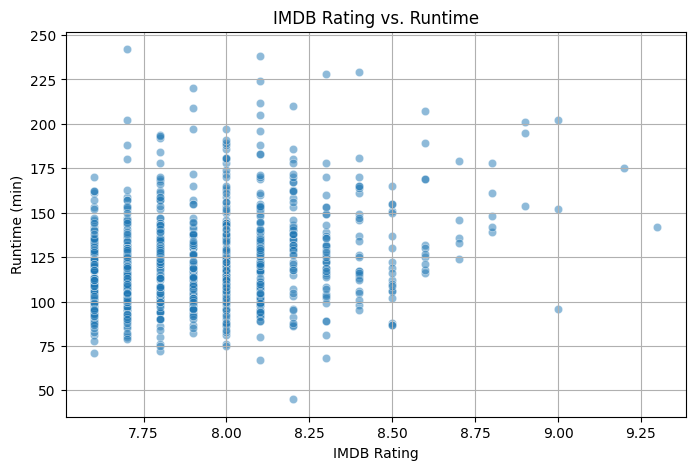

In [ ]:
# 1-IMDB Rating vs. Runtime
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['IMDB_Rating'], y=df['Runtime'], alpha=0.5)
plt.title('IMDB Rating vs. Runtime')
plt.xlabel('IMDB Rating')
plt.ylabel('Runtime (min)')
plt.grid(True)
plt.show()

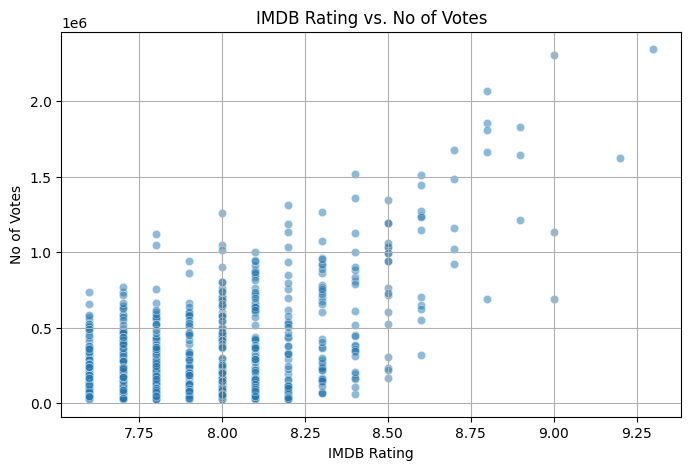

In [ ]:
# 2-IMDB Rating vs. No of Votes
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['IMDB_Rating'], y=df['No_of_Votes'], alpha=0.5)
plt.title('IMDB Rating vs. No of Votes')
plt.xlabel('IMDB Rating')
plt.ylabel('No of Votes')
plt.grid(True)
plt.show()

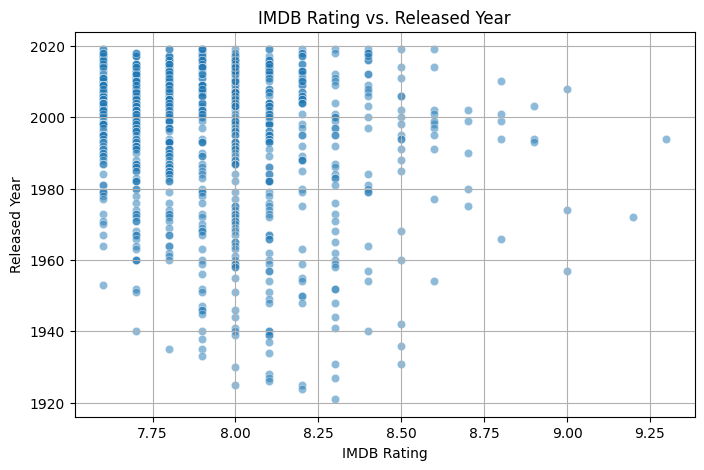

In [ ]:
# 3-IMDB Rating vs. Released Year
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['IMDB_Rating'], y=df['Released_Year'], alpha=0.5)
plt.title('IMDB Rating vs. Released Year')
plt.xlabel('IMDB Rating')
plt.ylabel('Released Year')
plt.grid(True)
plt.show()

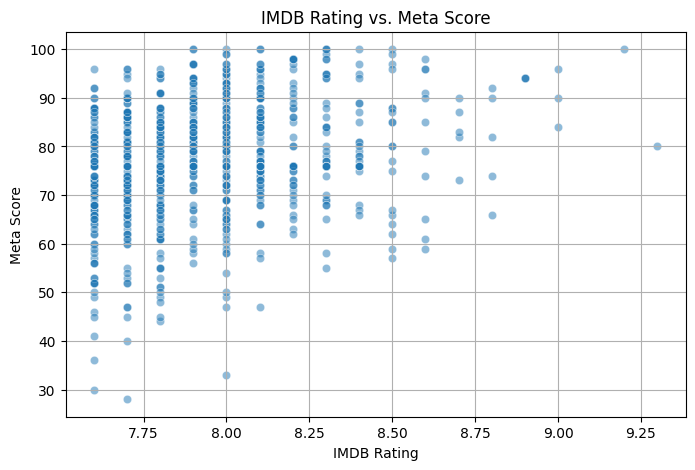

In [ ]:
# 4-IMDB Rating vs. Meta Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['IMDB_Rating'], y=df['Meta_score'], alpha=0.5)
plt.title('IMDB Rating vs. Meta Score')
plt.xlabel('IMDB Rating')
plt.ylabel('Meta Score')
plt.grid(True)
plt.show()

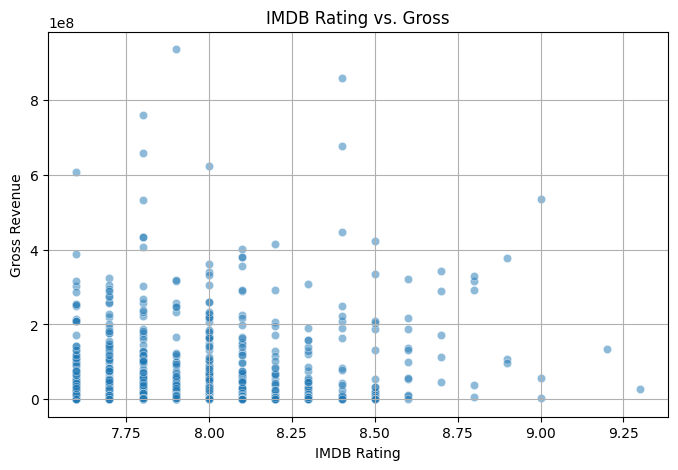

In [ ]:
# 5-IMDB Rating vs. Gross
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['IMDB_Rating'], y=df['Gross'], alpha=0.5)
plt.title('IMDB Rating vs. Gross')
plt.xlabel('IMDB Rating')
plt.ylabel('Gross Revenue')
plt.grid(True)
plt.show()

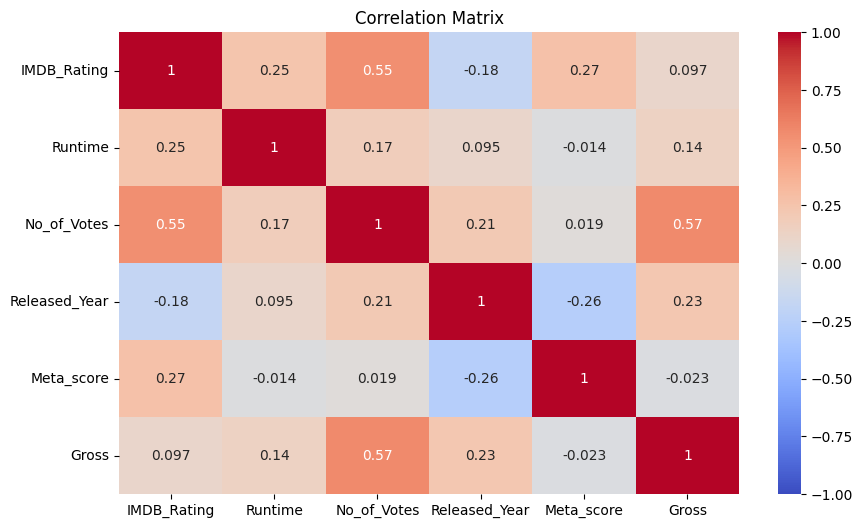

In [ ]:
# 6-Correlation Matrix
plt.figure(figsize=(10, 6))
numeric_features = df[['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Released_Year', 'Meta_score', 'Gross']]
correlation_matrix = numeric_features.corr()

sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

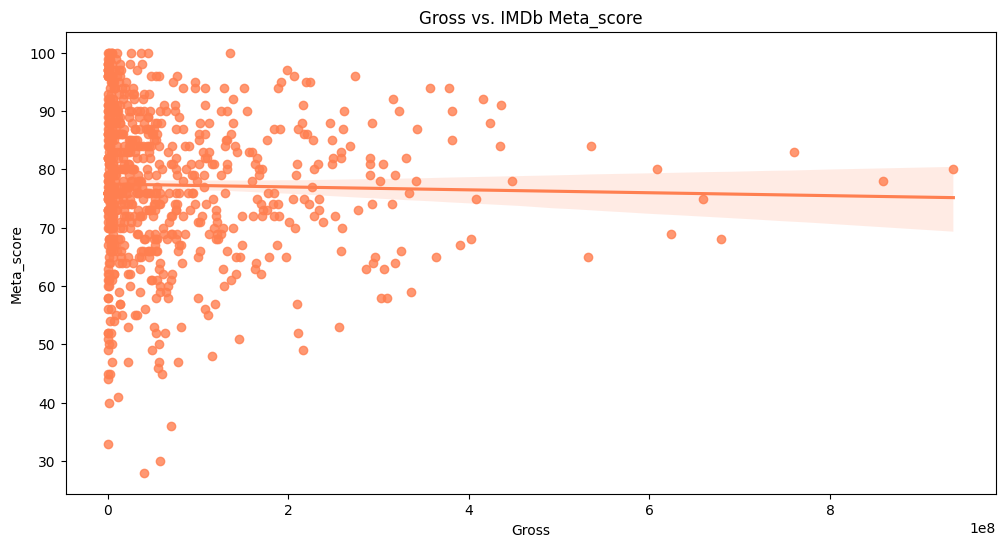

In [ ]:
# 7-Gross vs. IMDb Meta_score
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['Meta_score'], color='coral')
plt.title('Gross vs. IMDb Meta_score')
plt.xlabel('Gross')
plt.ylabel('Meta_score')
plt.show()

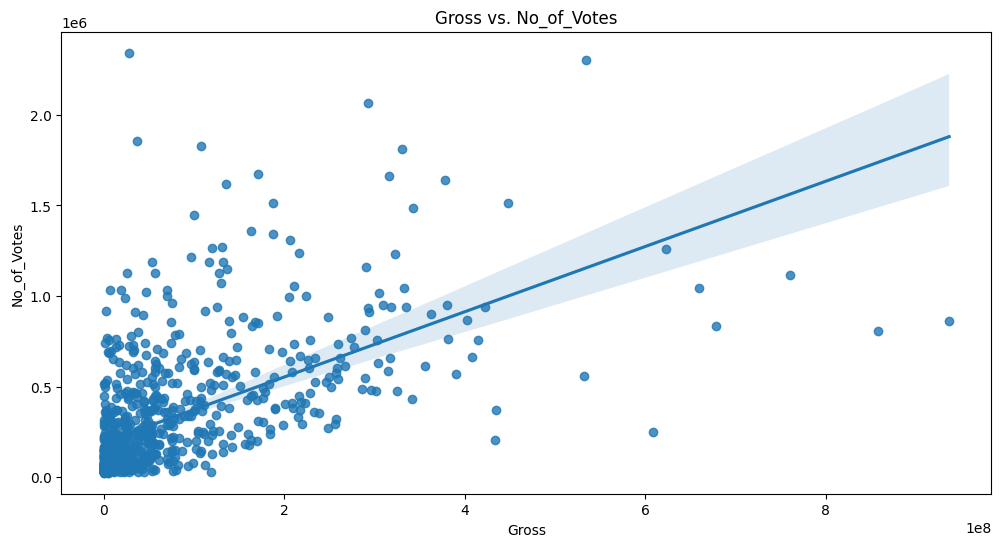

In [ ]:
# 8-Gross vs. No_of_Votes
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['No_of_Votes'])
plt.title('Gross vs. No_of_Votes')
plt.xlabel('Gross')
plt.ylabel('No_of_Votes')
plt.show()

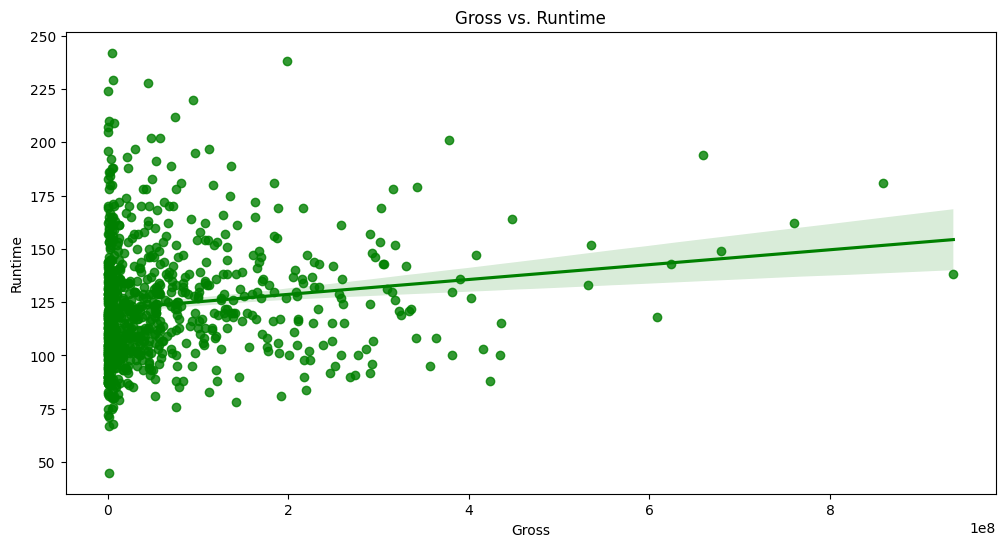

In [ ]:
# 9- Gross vs. Runtime
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['Runtime'], color='green')
plt.title('Gross vs. Runtime')
plt.xlabel('Gross')
plt.ylabel('Runtime')
plt.show()

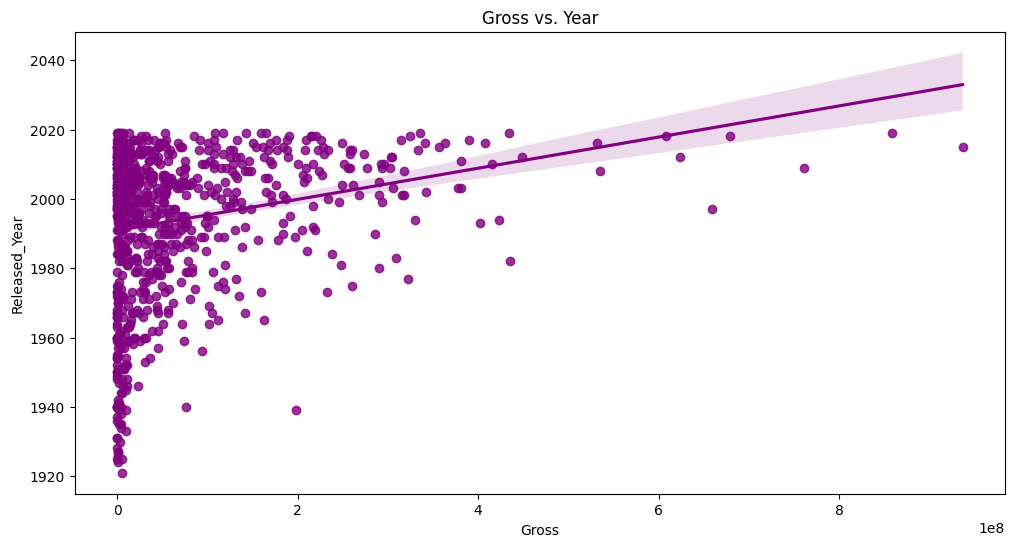

In [ ]:
# 10-Gross vs. Year
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['Released_Year'], color='purple')
plt.title('Gross vs. Year')
plt.xlabel('Gross')
plt.ylabel('Released_Year')
plt.show()

<ipython-input-41-e5d1f6e72a6d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')


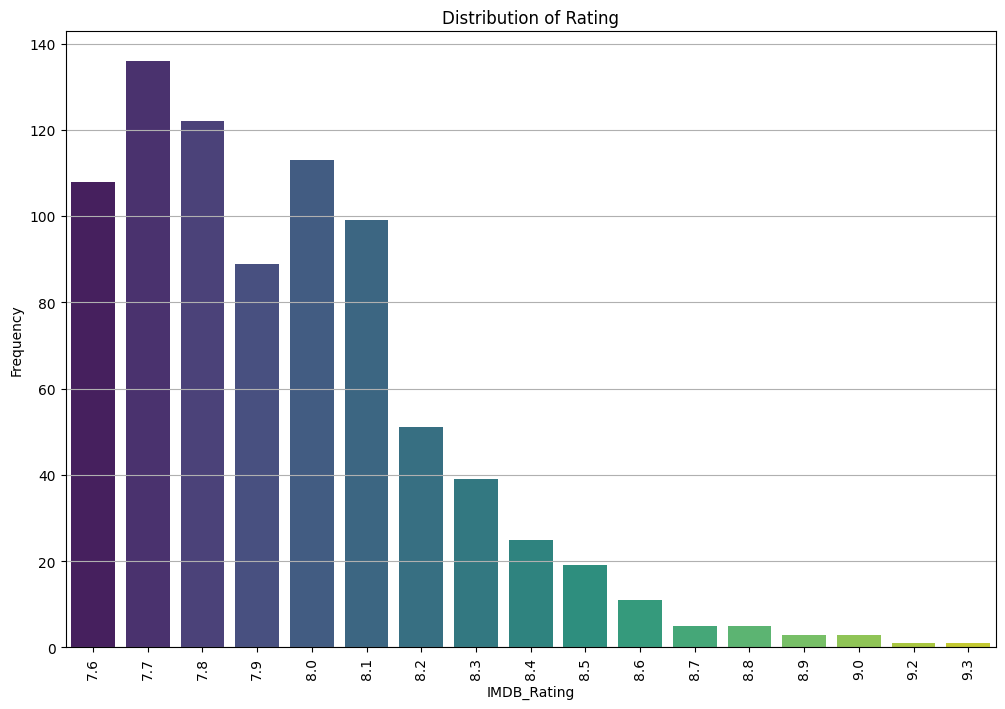

In [ ]:
# 11-Distribution of Rating
Distribution_Rating = df['IMDB_Rating'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')
plt.title("Distribution of Rating")
plt.xlabel('IMDB_Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

Mode of Meta_score 0    76
Name: Meta_score, dtype: int64


<ipython-input-45-f0d04629ca54>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')


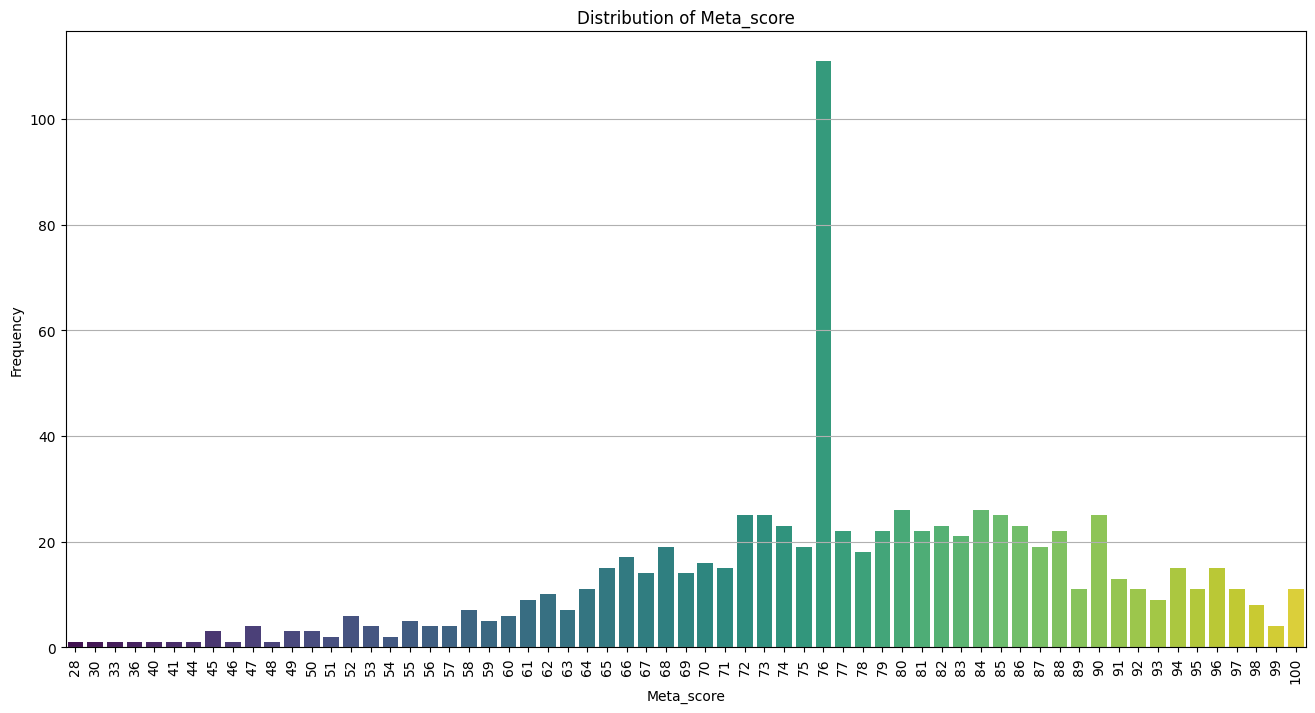

In [ ]:
# 12-Distribution of Meta_score
# note there were 157 missing values from this column so i filled it with the mode values
Distribution_Rating = df['Meta_score'].value_counts().sort_index()
print("Mode of Meta_score" ,df['Meta_score'].mode())

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')
plt.title("Distribution of Meta_score")
plt.xlabel('Meta_score')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

In [ ]:
# 13-Gross trends over the years
fig = px.area(df, x='Released_Year', y='Gross', hover_data=['Gross', 'Released_Year'])
fig.update_layout(
    title='Gross trends over the years',
    xaxis_title="Year",
    yaxis_title="Gross",
)
fig.show()

<ipython-input-49-67052c42234e>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-49-67052c42234e>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-49-67052c42234e>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-49-67052c42234e>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-49-67052c42234e>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-49-67052c42234e>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e.

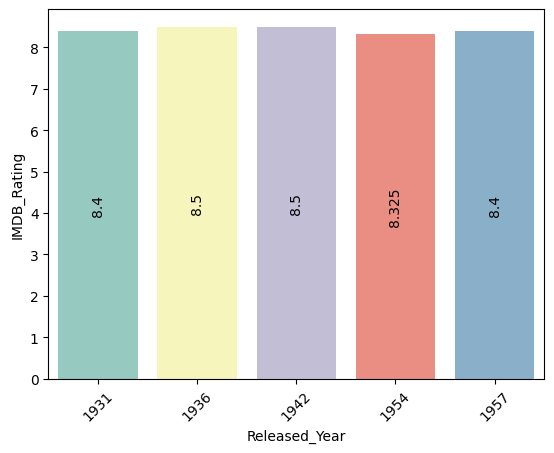

In [ ]:
# 14-most rated 5 years
fig, axes = plt.subplots()
grouped = df.groupby("Released_Year")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=False)
sns.barplot(x=mean1.index[:5], y=mean1.iloc[:5, 0].values, ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.ylabel('IMDB_Rating')
plt.show()

<ipython-input-50-63cb6fd4d395>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-50-63cb6fd4d395>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-50-63cb6fd4d395>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-50-63cb6fd4d395>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-50-63cb6fd4d395>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-50-63cb6fd4d395>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e.

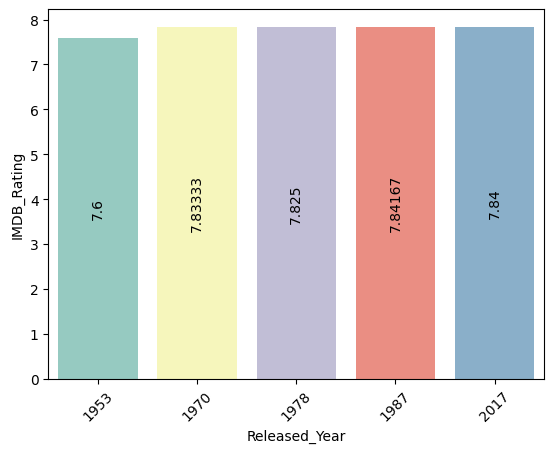

In [ ]:
# 15-less rated 5 years
fig, axes = plt.subplots()
grouped = df.groupby("Released_Year")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=True)
sns.barplot(x=mean1.index[:5], y=mean1.iloc[:5, 0].values, ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.ylabel('IMDB_Rating')
plt.show()

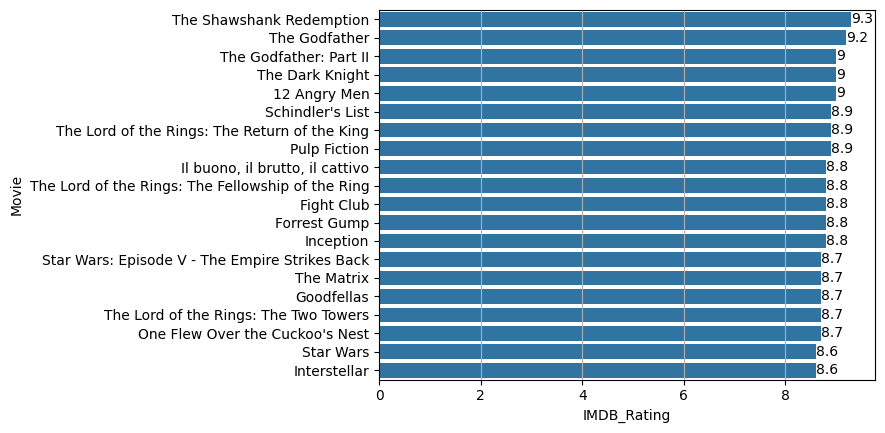

In [ ]:
# 16-most rated 20 movies
fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=False)
sns.barplot(y=mean1.index[:20], x=mean1.iloc[:20, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
plt.ylabel('Movie')
plt.xlabel('IMDB_Rating')
plt.grid(True, axis='x')
plt.show()

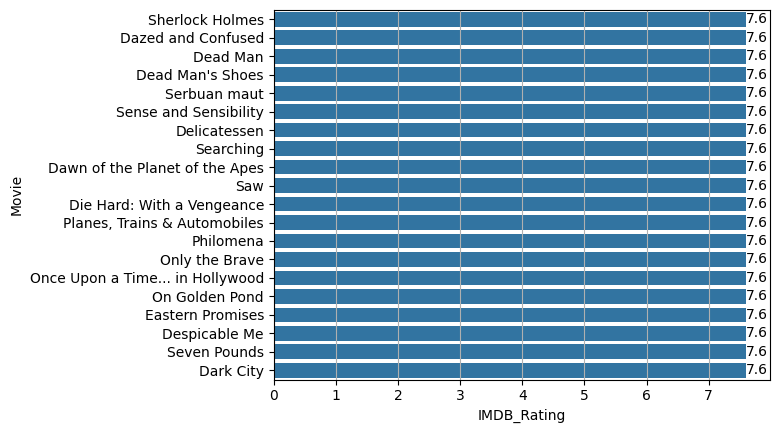

In [ ]:
# 17-less rated 20 movies
fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=True)
sns.barplot(y=mean1.index[:20], x=mean1.iloc[:20, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
plt.ylabel('Movie')
plt.xlabel('IMDB_Rating')
plt.grid(True, axis='x')
plt.show()

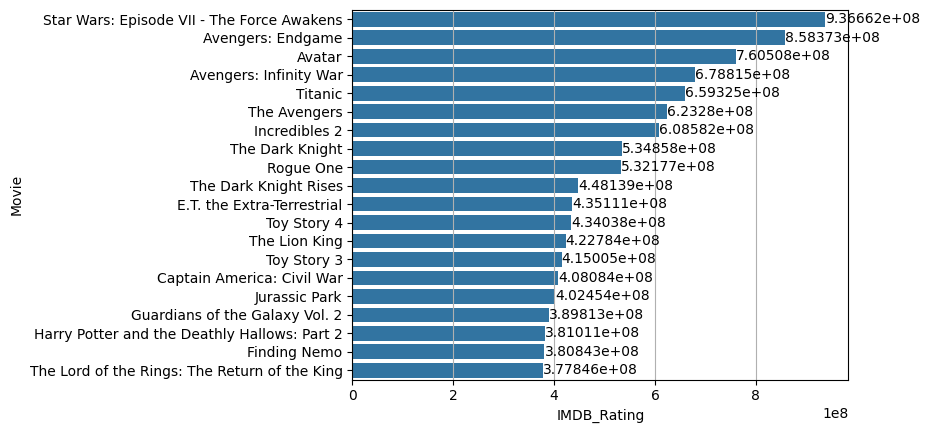

In [ ]:
# 18-most Gross 20 movies
fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["Gross"].mean())
mean1 = mean.sort_values("Gross", ascending=False)
sns.barplot(y=mean1.index[:20], x=mean1.iloc[:20, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
plt.ylabel('Movie')
plt.xlabel('IMDB_Rating')
plt.grid(True, axis='x')
plt.show()

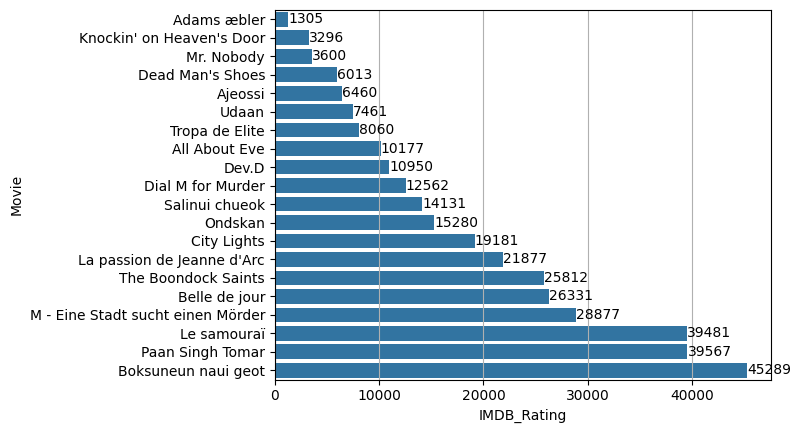

In [ ]:
# 19-less Gross 20 movies
fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["Gross"].mean())
mean1 = mean.sort_values("Gross", ascending=True)
sns.barplot(y=mean1.index[:20], x=mean1.iloc[:20, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
plt.ylabel('Movie')
plt.xlabel('IMDB_Rating')
plt.grid(True, axis='x')
plt.show()

<ipython-input-60-65964b85f4f5>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-60-65964b85f4f5>:17: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



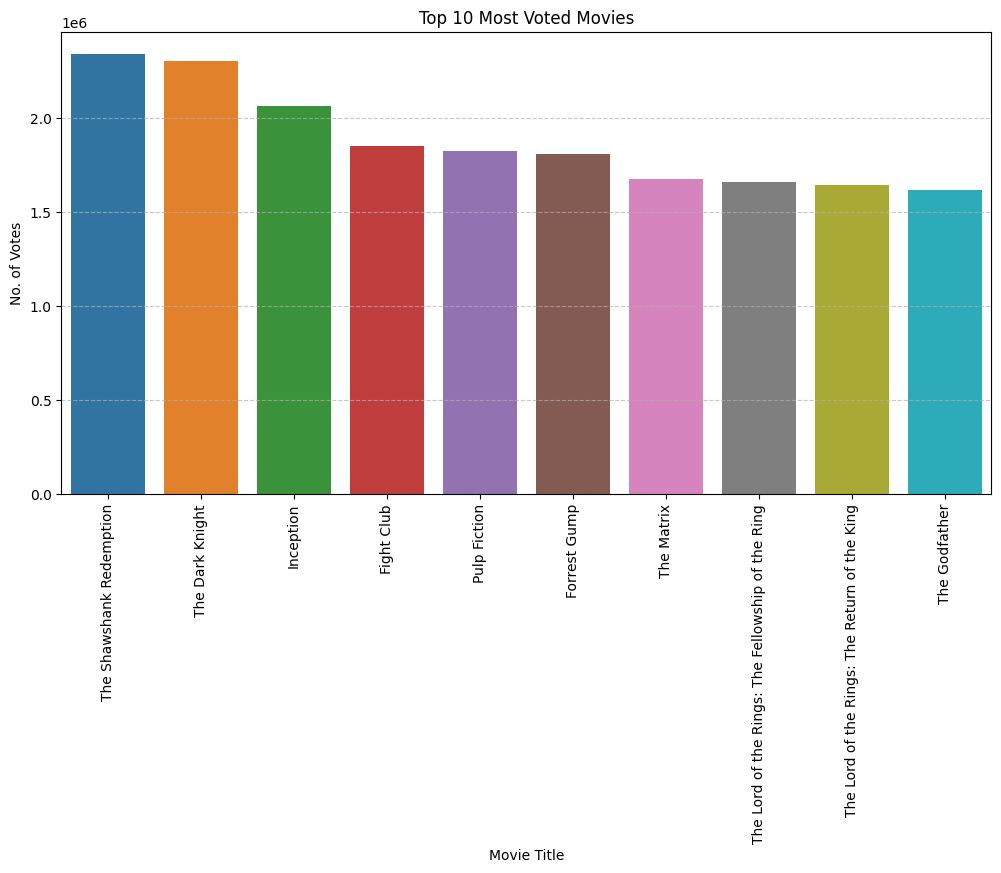

In [ ]:
# 20- most voted 10 movies

fig, axes = plt.subplots(figsize=(12, 6))

grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=False)
colors = sns.color_palette("tab10", 10)  # Generates 10 unique colors
sns.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette=colors)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.xlabel("Movie Title")
plt.ylabel("No. of Votes")
plt.title("Top 10 Most Voted Movies")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-61-d898d57c2927>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-61-d898d57c2927>:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



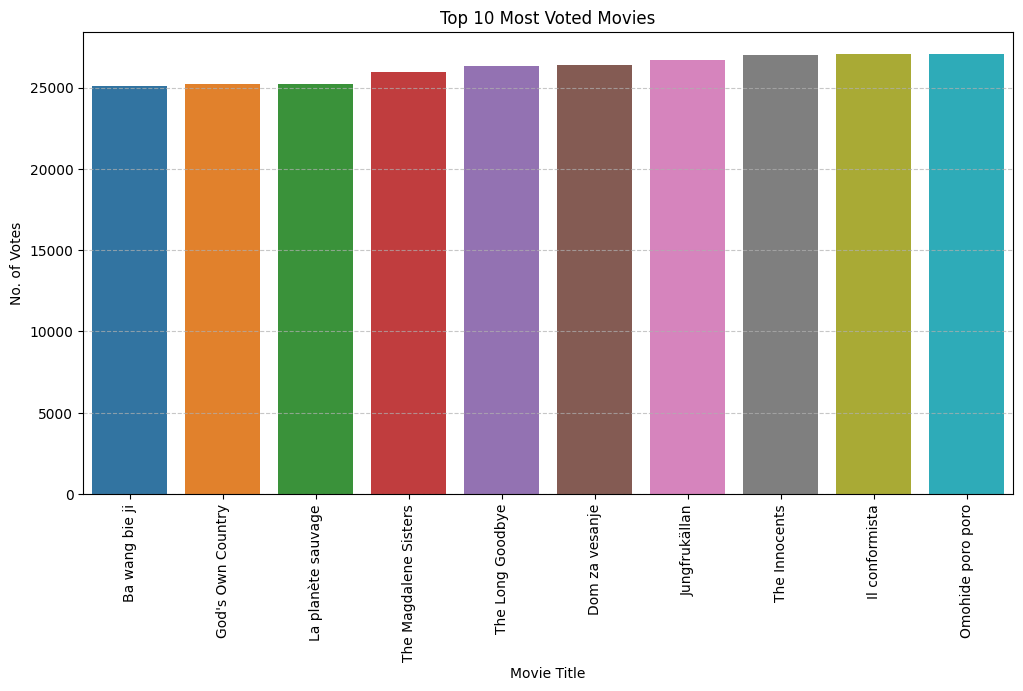

In [ ]:
# 21- less voted 10 movies

fig, axes = plt.subplots(figsize=(12, 6))
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=True)
colors = sns.color_palette("tab10", 10)  # Generates 10 unique colors
sns.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette=colors)
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.xlabel("Movie Title")
plt.ylabel("No. of Votes")
plt.title("Less 10 Most Voted Movies")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

<ipython-input-63-a1c765805af5>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




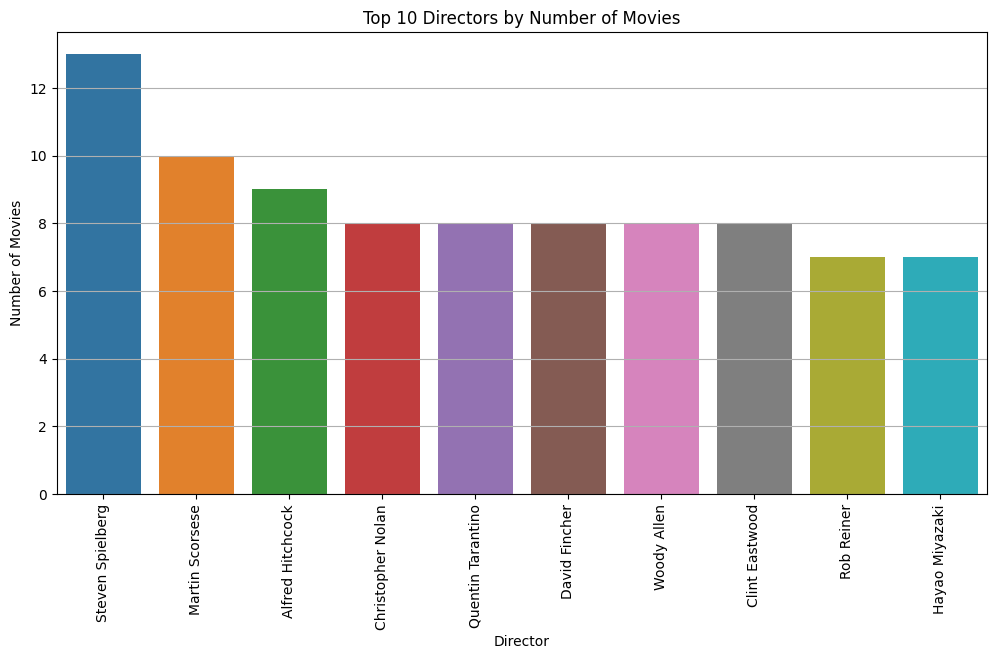

,count
Director,
Steven Spielberg,13
Martin Scorsese,10
Alfred Hitchcock,9
Christopher Nolan,8
Quentin Tarantino,8
David Fincher,8
Woody Allen,8
Clint Eastwood,8
Rob Reiner,7


In [ ]:
# 21-Directors with higher number of movies
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
colors = sns.color_palette("tab10", len(top_directors))
sns.barplot(x=top_directors.index, y=top_directors.values,palette=colors)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.show()

top_directors

<ipython-input-70-7f4ad52c1b33>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




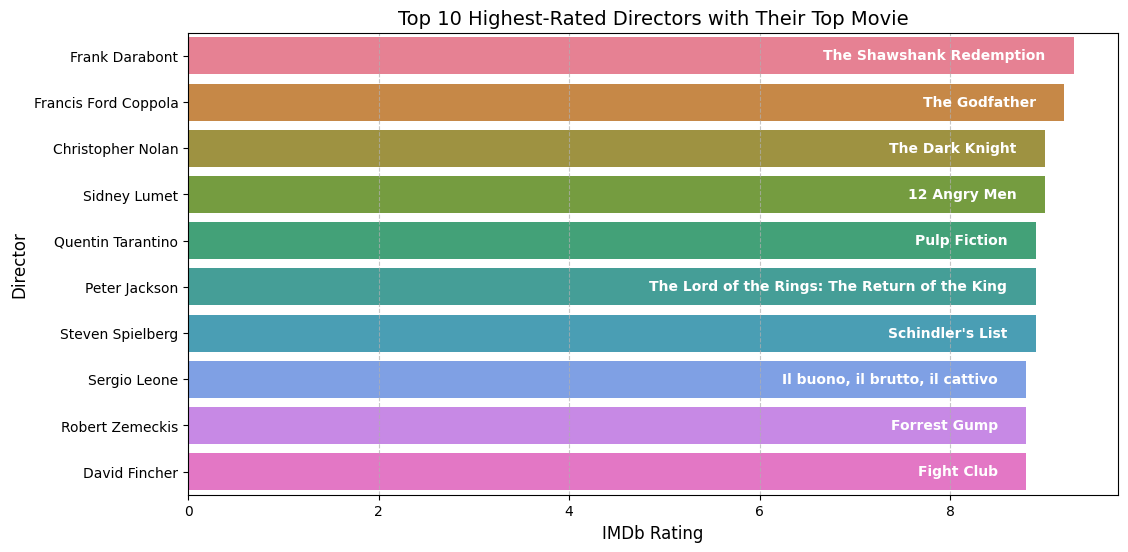

In [ ]:
# 22-most rated 10 directors
if 'Director' in df.columns and 'IMDB_Rating' in df.columns and 'Series_Title' in df.columns:

    # Group by director and find the highest-rated movie for each director
    top_movies = df.loc[df.groupby("Director")["IMDB_Rating"].idxmax()]

    # Sort directors by highest rating and select the top 10
    top_directors_sorted = top_movies.sort_values("IMDB_Rating", ascending=False).head(10)

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Generate unique colors for each bar
    colors = sns.color_palette("husl", len(top_directors_sorted))

    # Create horizontal bar plot
    sns.barplot(x=top_directors_sorted["IMDB_Rating"],
                y=top_directors_sorted["Director"],
                ax=ax,
                palette=colors)

    # Add the top movie name inside the bars
    for index, value in enumerate(top_directors_sorted["IMDB_Rating"]):
        movie_name = top_directors_sorted.iloc[index]["Series_Title"]
        ax.text(value - 0.3, index, movie_name,
                ha="right", va="center", fontsize=10, fontweight="bold", color="white")

    # Labels and title
    plt.xlabel("IMDb Rating", fontsize=12)
    plt.ylabel("Director", fontsize=12)
    plt.title("Top 10 Highest-Rated Directors with Their Top Movie", fontsize=14)
    plt.grid(True, axis="x", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

else:
    print("Error: Ensure 'Director', 'IMDB_Rating', and 'Series_Title' columns exist in the DataFrame.")

<ipython-input-72-f6a85b28f6c2>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




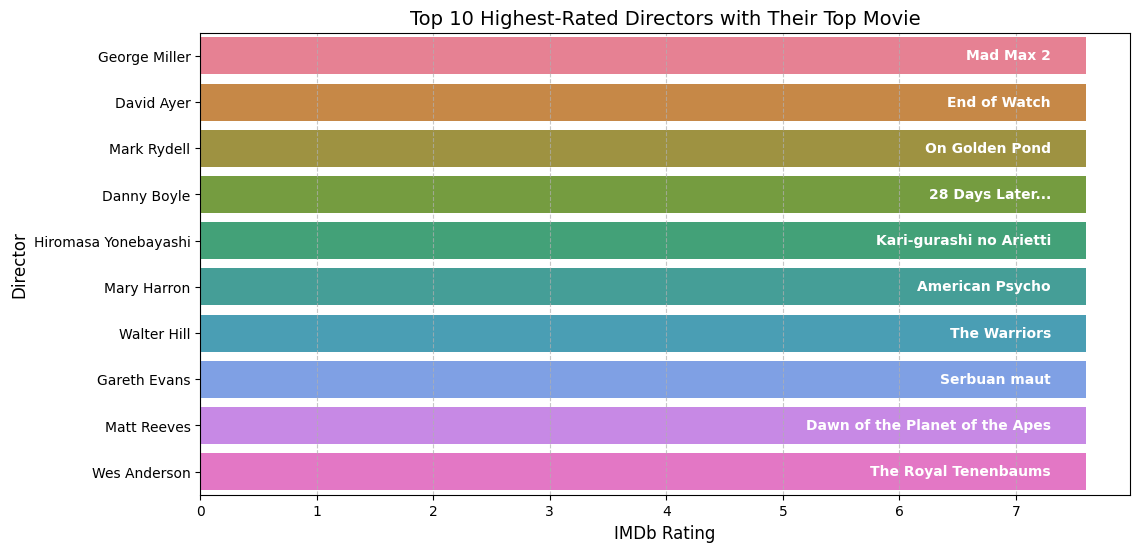

In [ ]:
# 23-less rated 10 directors with their least movie rating
if 'Director' in df.columns and 'IMDB_Rating' in df.columns and 'Series_Title' in df.columns:

    # Group by director and find the lowest-rated movie for each director
    top_movies = df.loc[df.groupby("Director")["IMDB_Rating"].idxmin()]

    # Sort directors by lowest rating and select the top 10
    top_directors_sorted = top_movies.sort_values("IMDB_Rating", ascending=True).head(10)

    # Create figure
    fig, ax = plt.subplots(figsize=(12, 6))

    # Generate unique colors for each bar
    colors = sns.color_palette("husl", len(top_directors_sorted))

    # Create horizontal bar plot
    sns.barplot(x=top_directors_sorted["IMDB_Rating"],
                y=top_directors_sorted["Director"],
                ax=ax,
                palette=colors)

    # Add the top movie name inside the bars
    for index, value in enumerate(top_directors_sorted["IMDB_Rating"]):
        movie_name = top_directors_sorted.iloc[index]["Series_Title"]
        ax.text(value - 0.3, index, movie_name,
                ha="right", va="center", fontsize=10, fontweight="bold", color="white")

    # Labels and title
    plt.xlabel("IMDb Rating", fontsize=12)
    plt.ylabel("Director", fontsize=12)
    plt.title("Top 10 Highest-Rated Directors with Their Top Movie", fontsize=14)
    plt.grid(True, axis="x", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

else:
    print("Error: Ensure 'Director', 'IMDB_Rating', and 'Series_Title' columns exist in the DataFrame.")

<ipython-input-73-2e4802c74df3>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




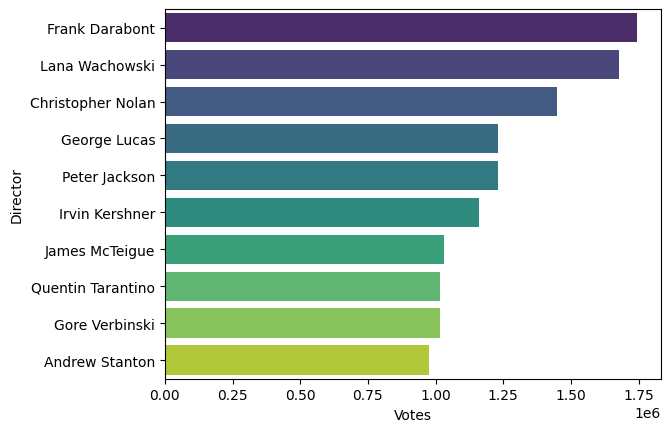

In [ ]:
# 24- top 10 most voted directors
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=False)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='viridis')
plt.xlabel('Votes')
plt.show()

<ipython-input-74-7f1aec4f0cb9>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




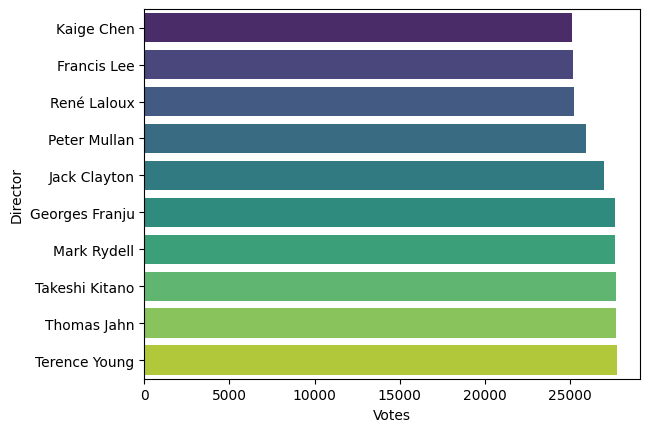

In [ ]:
# 24- less 10  voted directors
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=True)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='viridis')
plt.xlabel('Votes')
plt.show()

<ipython-input-75-a172a8a26d73>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




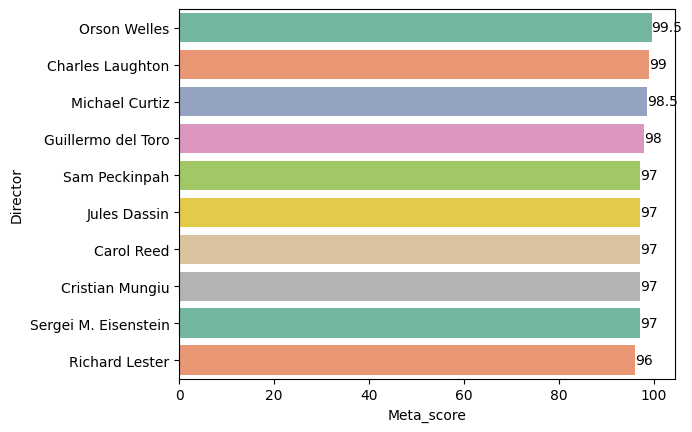

In [ ]:
#25- 10 directors with highest meta_score
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Meta_score"].mean())
mean1 = mean.sort_values("Meta_score", ascending=False)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='Set2')
for container in axes.containers:
    axes.bar_label(container)
plt.xlabel('Meta_score')
plt.show()

<ipython-input-77-be7c95a5a869>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




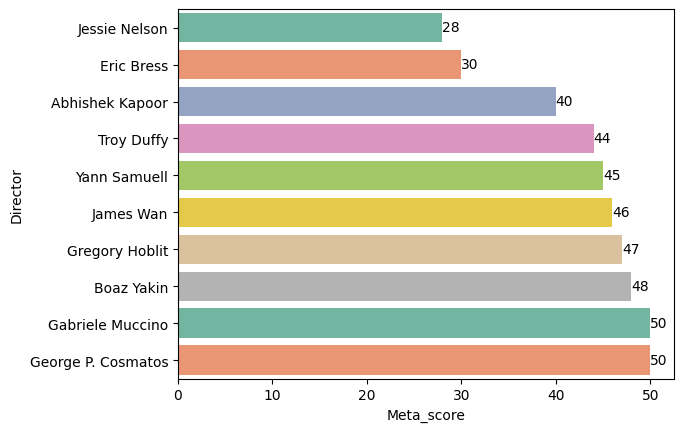

In [ ]:
# 26- 10 directors with lowesr meta_score
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Meta_score"].mean())
mean1 = mean.sort_values("Meta_score", ascending=True)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='Set2')
for container in axes.containers:
    axes.bar_label(container)
plt.xlabel('Meta_score')
plt.show()

<ipython-input-79-032cfddf9fd4>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




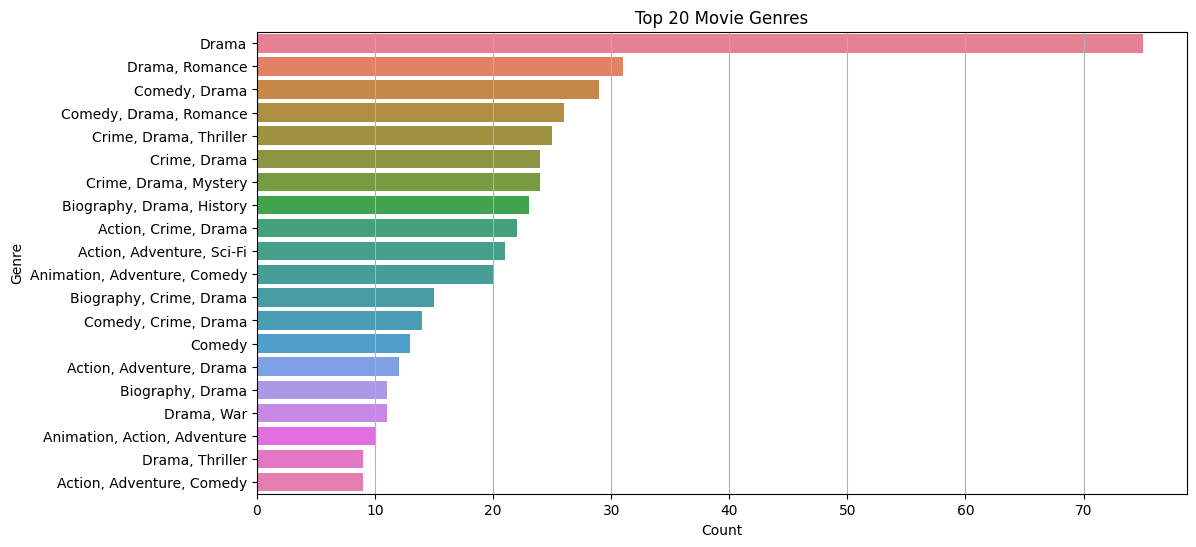

In [ ]:
# 27-Distribution of Movie Genres
# Genre Combination
genre_counts= df['Genre'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=sns.color_palette("husl", len(genre_counts)))
plt.title('Top 20 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()


<ipython-input-81-99e2d6a6ed24>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




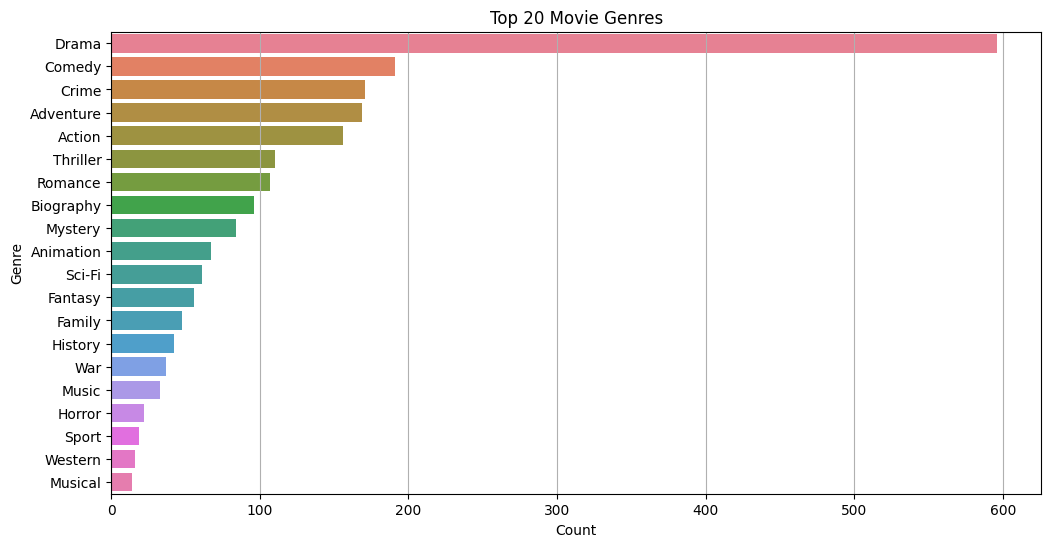

In [ ]:
# 28- top geners
# individual genre
genre_series = df['Genre'].dropna().apply(lambda x: x.split(', '))
genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(genres).value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index,palette=sns.color_palette("husl", len(genre_counts)))
plt.title('Top 20 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()

In [ ]:
# 29- Rating by Genres
fig = px.pie(df, values='IMDB_Rating', names='Genre', hover_data=['Genre'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Rating by Genres')
fig.show()

In [ ]:
# 30- Meta_score by Genres
fig = px.pie(df, values='Meta_score', names='Genre', hover_data=['Genre'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Meta_score by Genres')
fig.show()